In [5]:
import re, numpy as np, pandas as pd, matplotlib.pyplot as plt

In [11]:
#Task1:
def calculator(operation):
    if operation == 'add':
        return lambda a,b: a+b
    elif operation == 'sub':
        return lambda a,b: a-b
    elif operation == 'mul':
        return lambda a,b: a*b
    elif operation == 'div':
        return lambda a,b: a/b if (a > 0 and b > 0) else 'Division by zero error'
    else:
        return ValueError('Invalid operation')





In [18]:
add_fn = calculator("ad")
add_fn


ValueError('Invalid operation')

In [19]:
add_fn = calculator("add")
print(add_fn(2,3))

5


In [20]:
div_fn = calculator("div")
div_fn(2,0)

'Division by zero error'

TASK 2

In [47]:
file = pd.read_csv('C:\\Users\\Pc\\Downloads\\students_scores_data.csv')
df  = pd.DataFrame(file)
df.head()

null_values_math = df['Math'].isnull()
null_valued_science = df['Science'].isnull()
null_values_eng = df['English'].isnull()


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32    False
33    False
34     True
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45     True
46    False
47    False
48    False
49    False
Name: Math, dtype: bool

In [48]:

#Fill the missing values with the average value of each column
df['Math'] = pd.to_numeric(df['Math'], errors='coerce')
math_avg = df['Math'].mean()
science_avg = df['Science'].mean()
english_avg = df['English'].mean()
print(math_avg,science_avg,english_avg)


df['Math'] = df['Math'].fillna(math_avg)
df['Science'] = df['Science'].fillna(science_avg)
df['English'] = df['English'].fillna(english_avg)



77.09302325581395 75.65957446808511 76.19565217391305


In [46]:
print(df['Math'])

0     98.000000
1     88.000000
2     74.000000
3     67.000000
4     80.000000
5     98.000000
6     78.000000
7     77.093023
8     70.000000
9     70.000000
10    77.093023
11    95.000000
12    99.000000
13    83.000000
14    77.093023
15    81.000000
16    61.000000
17    83.000000
18    89.000000
19    97.000000
20    77.093023
21    80.000000
22    92.000000
23    71.000000
24    81.000000
25    84.000000
26    86.000000
27    87.000000
28    77.093023
29   -66.000000
30    62.000000
31    96.000000
32    66.000000
33    80.000000
34    77.093023
35    98.000000
36    77.000000
37    63.000000
38    84.000000
39    73.000000
40    68.000000
41    85.000000
42    61.000000
43    79.000000
44    87.000000
45    77.093023
46    67.000000
47    94.000000
48    73.000000
49    76.000000
Name: Math, dtype: float64


In [49]:
#Calculate the average score:
df['Average'] = df[['Math','Science','English']].mean(axis=1)
print(df)

    Student_ID         Name       Math     Science    English    Average
0          101  Student_101  98.000000   95.000000  93.000000  95.333333
1          102  Student_102  88.000000   99.000000  92.000000  93.000000
2          103  Student_103  74.000000   63.000000  82.000000  73.000000
3          104  Student_104  67.000000   61.000000  83.000000  70.333333
4          105  Student_105  80.000000   65.000000  96.000000  80.333333
5          106  Student_106  98.000000   63.000000  94.000000  85.000000
6          107  Student_107  78.000000   88.000000 -34.000000  44.000000
7          108  Student_108  77.093023   77.000000  81.000000  78.364341
8          109  Student_109  70.000000   75.659574  86.000000  77.219858
9          110  Student_110  70.000000   93.000000  94.000000  85.666667
10         111  Student_111  77.093023   69.000000  60.000000  68.697674
11         112  Student_112  95.000000   95.000000  94.000000  94.666667
12         113  Student_113  99.000000   75.659574 

In [56]:
df['Pass_Status'] = [1 if i < 75 else 0 for i in df['Average']]
print(df.head())

   Student_ID         Name  Math  Science  English    Average  Pass_Status
0         101  Student_101  98.0     95.0     93.0  95.333333            0
1         102  Student_102  88.0     99.0     92.0  93.000000            0
2         103  Student_103  74.0     63.0     82.0  73.000000            1
3         104  Student_104  67.0     61.0     83.0  70.333333            1
4         105  Student_105  80.0     65.0     96.0  80.333333            0


In [57]:
#Count the total number of students pass and calculate the percentage of pass students
pass_count = 0 
for i in df['Pass_Status']:
    if i == 0:
        pass_count += 1
pass_percentage = (pass_count/len(df['Pass_Status']))*100
print('Number of pass students:' , pass_count)
print('Percentage of pass students:', pass_percentage)

Number of pass students: 34
Percentage of pass students: 68.0


In [58]:
#Top 3 students based on total marks
df['Total'] = df['Math'] + df['Science'] + df['English']
df = df.sort_values(by='Total', ascending=False)
print('Top 3 Students',df.head(3))

Top 3 Students     Student_ID         Name  Math  Science  English    Average  Pass_Status  \
0          101  Student_101  98.0     95.0     93.0  95.333333            0   
11         112  Student_112  95.0     95.0     94.0  94.666667            0   
1          102  Student_102  88.0     99.0     92.0  93.000000            0   

    Total  
0   286.0  
11  284.0  
1   279.0  


In [59]:
print(df)

    Student_ID         Name       Math     Science    English    Average  \
0          101  Student_101  98.000000   95.000000  93.000000  95.333333   
11         112  Student_112  95.000000   95.000000  94.000000  94.666667   
1          102  Student_102  88.000000   99.000000  92.000000  93.000000   
19         120  Student_120  97.000000   80.000000  98.000000  91.666667   
44         145  Student_145  87.000000  100.000000  87.000000  91.333333   
12         113  Student_113  99.000000   75.659574  96.000000  90.219858   
35         136  Student_136  98.000000   83.000000  88.000000  89.666667   
26         127  Student_127  86.000000   88.000000  91.000000  88.333333   
41         142  Student_142  85.000000   92.000000  87.000000  88.000000   
18         119  Student_119  89.000000   99.000000  73.000000  87.000000   
31         132  Student_132  96.000000   68.000000  96.000000  86.666667   
27         128  Student_128  87.000000   74.000000  98.000000  86.333333   
9          1

Task 3


c:\Users\Pc\anaconda3\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


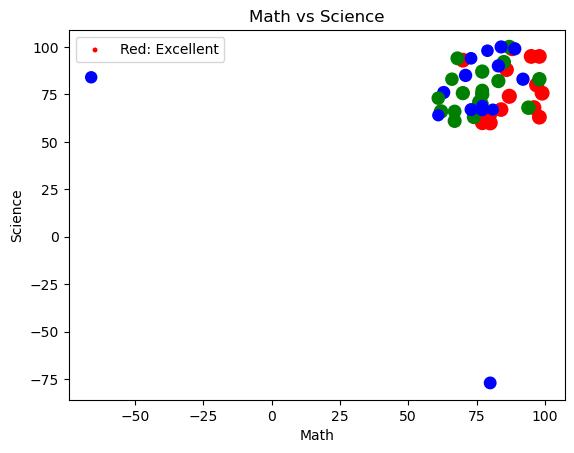

In [ ]:

colors = np.where(df['English'] >= 90, 'r', np.where(df['English'] >= 75, 'g', 'b'))
legend = ['Red: Excellent', 'Green: Good','Blue: Average']

plt.scatter(df['Math'],df['Science'], color=colors,s=df['English'],label='Math vs Science')
plt.xlabel('Math')
plt.ylabel('Science')
plt.legend(legend)
plt.title('Math vs Science')
plt.show()

Task4

In [70]:
#Create two numpy arrays of size 10 with random values:
arr1 = np.random.randint(1,100,10)
arr2 = np.random.randint(1,100,10)
print(arr1,arr2)

[57 76 92 34 40 81  5 80 52 51] [88 54 72 37 71  6 33 90 49 51]


In [71]:
#Perform element-wise addition, subtraction, multiplication, and division on the two arrays.
addition = arr1 + arr2
subtraction = arr1 - arr2
multiplication = arr1 * arr2
division = arr1 / arr2
print(addition,subtraction,multiplication,division)

[145 130 164  71 111  87  38 170 101 102] [-31  22  20  -3 -31  75 -28 -10   3   0] [5016 4104 6624 1258 2840  486  165 7200 2548 2601] [ 0.64772727  1.40740741  1.27777778  0.91891892  0.56338028 13.5
  0.15151515  0.88888889  1.06122449  1.        ]


In [72]:
#dot product:
dot_product = np.dot(arr1,arr2)
print("dot product: ",dot_product)

dot product:  32842


Task5

In [73]:
#random arrays:
array1 = np.random.rand(4,4)
array2 = np.random.rand(4,4)

#addition and subtraction element wise:
array_addition = array1 + array2
array_subtraction = array1 - array2
print("Array addition: ", array_addition,"Array subtraction",array_subtraction)

array_multiplication = np.matmul(array1,array2)
print("multiplication: ",array_multiplication)



Array addition:  [[0.48966116 1.00593516 1.39380527 0.97863609]
 [1.26811607 0.77750923 0.65129815 1.60371809]
 [1.03885026 1.53125974 0.61919942 1.15532686]
 [1.44159731 0.54728546 1.08773574 1.38108682]] Array subtraction [[-0.12971808 -0.57292776 -0.43509348  0.341322  ]
 [-0.22551002 -0.77066854  0.53798527 -0.22935875]
 [-0.2038673  -0.41415341 -0.27745875  0.67512435]
 [-0.4513459   0.0431485   0.58180917  0.23252551]]
multiplication:  [[1.13992652 0.94230085 0.55870085 0.74989031]
 [1.18387839 1.16580889 0.91732541 0.70665997]
 [1.5188344  1.15885693 0.72154508 1.21159458]
 [1.6561195  1.63475105 1.04783844 1.09211608]]


In [76]:
#Find the row-wise sum of both arrays.
row_sum1 = np.sum(array1,axis=1)
row_sum2 = np.sum(array2,axis=1)

print("Row sum array1: ",row_sum,"Row sum array2: ",row_sum2)




# Compute the overall sum, mean, and standard deviation of the combined arrays.
overall_sum = np.sum(array1) + np.sum(array2)
overall_mean = np.mean(array1) + np.mean(array2)
overall_std = np.std(array1) + np.std(array2)
print("Overall sum: ",overall_sum,"Overall mean: ",overall_mean,"Overall std: ",overall_std)




Row sum array1:  [1.53581018 1.80654475 2.06214059 2.4319213 ] Row sum array2:  [2.3322275  2.49409679 2.2824957  2.02578403]
Overall sum:  16.97102083431685 Overall mean:  1.060688802144803 Overall std:  0.5489458053235737


TASK 6

In [94]:
rand_arr = np.random.randint(1,100,(6,6))
rand_arr

array([[81, 93, 22, 97, 45, 85],
       [ 1, 86, 82, 75, 99, 77],
       [ 4, 24, 89, 53, 51, 67],
       [60, 40, 97, 29, 53, 36],
       [64, 57,  9, 28, 60, 89],
       [32, 55,  1, 25, 75, 56]])

In [95]:
row_mean1 = np.mean(rand_arr,axis=1)

print("Row mean: ",row_mean1)

Row mean:  [70.5        70.         48.         52.5        51.16666667 40.66666667]


In [96]:
#mean max and min column wise:
max = np.max(rand_arr,axis=0)
min = np.min(rand_arr,axis=0)
mean = np.mean(rand_arr,axis=0)
std = np.std(rand_arr,axis=0)

print("Max: ",max,"Min: ",min,"Mean: ",mean)
print("Standard deviation: ",std)

Max:  [81 93 97 97 99 89] Min:  [ 1 24  1 25 45 36] Mean:  [40.33333333 59.16666667 50.         51.16666667 63.83333333 68.33333333]
Standard deviation:  [30.37908637 24.12064584 40.04164499 27.03341554 18.3159008  18.16284363]


In [97]:

#Identify outliers and replace with -1:
for i in range(len(rand_arr)):
    for j in range(len(rand_arr[i])):
        if rand_arr[j][i] > (2*std[i]+mean[i]) or rand_arr[j][i] < (2*std[i]-mean[i]):
            rand_arr[j][i] = -1
print(rand_arr)

[[81 93 -1 97 45 85]
 [-1 86 82 75 99 77]
 [-1 24 89 53 51 67]
 [60 40 97 29 53 36]
 [64 57 -1 28 60 89]
 [32 55 -1 25 75 56]]


In [102]:
# Masked Array:
# Select students who scored above 90 in at least one subject and calculate their
# average score.
students = []
for i in range(6):
    for j in range(6):
        if rand_arr[i][j] > 90:
            students.append(i)

students = np.unique(students)

print(students)
for i in students:
    print(np.mean(rand_arr[i]))



# Top n Students:
def top_n_students(n):
    total = np.sum(rand_arr,axis=1)
    total = np.argsort(total)
    return total[-n:]

print(top_n_students(3))

[0 1 3]
66.66666666666667
69.66666666666667
52.5
[3 0 1]
